# 机器学习练习 1 - 线性回归

这个是另一位大牛写的，作业内容在根目录： [作业文件](ex1.pdf)

代码修改并注释：黄海广，haiguang2000@qq.com

## 单变量线性回归

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


看下数据长什么样子

C:\ProgramData\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


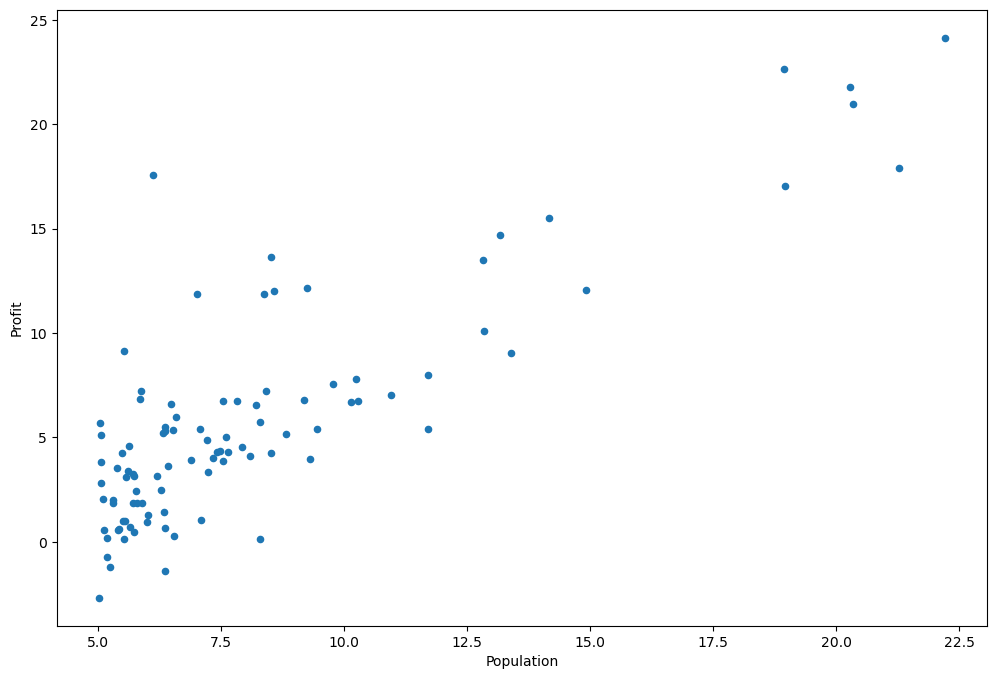

In [7]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化成本函数。 以下代码示例中实现的方程在“练习”文件夹中的“ex1.pdf”中有详细说明。

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [8]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [9]:
data.insert(0, 'Ones', 1)

现在我们来做一些变量初始化。

In [10]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#y是所有行，最后一列

观察下 X (训练集) and y (目标变量)是否正确.

In [11]:
X.head()#head()是观察前5行

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [12]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。

In [13]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

theta 是一个(1,2)矩阵

In [14]:
theta

matrix([[0, 0]])

看下维度

In [15]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数 (theta初始值为0).

In [16]:
computeCost(X, y, theta)

32.072733877455676

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [17]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        print(theta)
        
    return theta, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [43]:
alpha = 0.01
iters = 1000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [44]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

[[0.05839135 0.6532885 ]]
[[0.06289175 0.77000978]]
[[0.05782293 0.79134812]]
[[0.05106363 0.79572981]]
[[0.04401438 0.79709618]]
[[0.03692413 0.79792547]]
[[0.02983712 0.79865824]]
[[0.02276118 0.79937279]]
[[0.0156977  0.80008305]]
[[0.0086469 0.8007915]]
[[0.00160879 0.80149857]]
[[-0.00541662  0.80220436]]
[[-0.01242938  0.80290886]]
[[-0.01942949  0.8036121 ]]
[[-0.02641699  0.80431407]]
[[-0.03339189  0.80501478]]
[[-0.04035421  0.80571422]]
[[-0.04730399  0.8064124 ]]
[[-0.05424124  0.80710932]]
[[-0.06116598  0.80780498]]
[[-0.06807824  0.8084994 ]]
[[-0.07497804  0.80919256]]
[[-0.08186541  0.80988447]]
[[-0.08874035  0.81057513]]
[[-0.09560291  0.81126455]]
[[-0.10245309  0.81195272]]
[[-0.10929093  0.81263966]]
[[-0.11611644  0.81332535]]
[[-0.12292965  0.81400981]]
[[-0.12973057  0.81469304]]
[[-0.13651924  0.81537504]]
[[-0.14329567  0.8160558 ]]
[[-0.15005988  0.81673534]]
[[-0.15681191  0.81741365]]
[[-0.16355176  0.81809075]]
[[-0.17027946  0.81876662]]
[[-0.17699503  0

matrix([[-3.24140214,  1.1272942 ]])

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [45]:
computeCost(X, y, g)

4.515955503078914

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

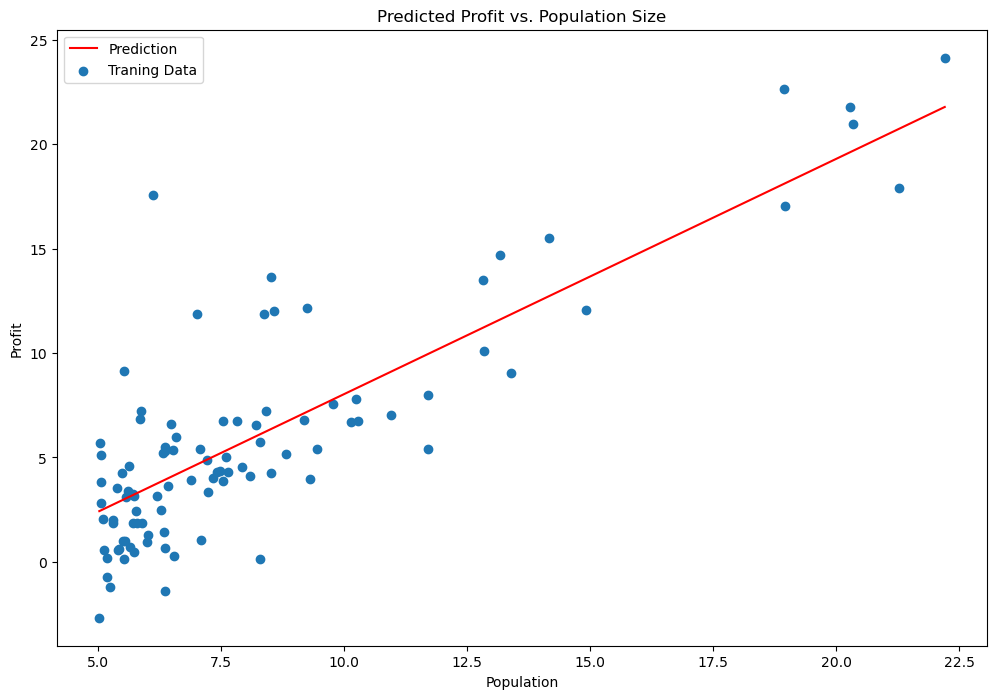

In [46]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

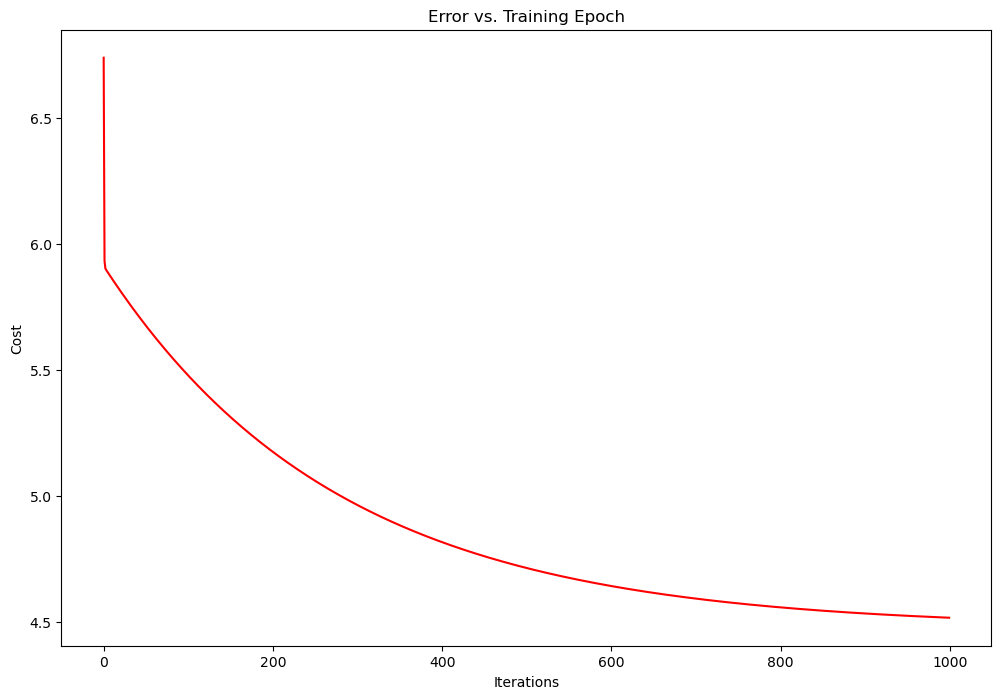

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 多变量线性回归

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [65]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。  
特征归一化的目的是将不同数量级的影响因素拉齐到同一数量级，以免在梯度下降过程中不收敛，或出现zigzag的路线。  
参考：https://zhuanlan.zhihu.com/p/265411459  
此处使用的是特征归一化中Standardization (Z-score Normalization)方法。  
这对于pandas来说很简单：

In [66]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [67]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

[[-7.08652994e-19  8.36796367e-03  4.32851306e-03]]
[[-1.62990189e-18  1.66303056e-02  8.56880107e-03]]
[[-2.57477255e-18  2.47885430e-02  1.27223064e-02]]
[[-3.59050851e-18  3.28441704e-02  1.67904489e-02]]
[[-4.41727033e-18  4.07986599e-02  2.07746264e-02]]
[[-5.43300629e-18  4.86534616e-02  2.46762151e-02]]
[[-6.42512048e-18  5.64100037e-02  2.84965695e-02]]
[[-7.53534351e-18  6.40696932e-02  3.22370232e-02]]
[[-8.57470123e-18  7.16339158e-02  3.58988891e-02]]
[[-9.37784129e-18  7.91040367e-02  3.94834595e-02]]
[[-1.02754684e-17  8.64814003e-02  4.29920067e-02]]
[[-1.12912044e-17  9.37673313e-02  4.64257830e-02]]
[[-1.20471009e-17  1.00963134e-01  4.97860214e-02]]
[[-1.32754328e-17  1.08070094e-01  5.30739355e-02]]
[[-1.42439252e-17  1.15089477e-01  5.62907201e-02]]
[[-1.52360394e-17  1.22022530e-01  5.94375514e-02]]
[[-1.61572883e-17  1.28870482e-01  6.25155871e-02]]
[[-1.72911331e-17  1.35634541e-01  6.55259669e-02]]
[[-1.80942731e-17  1.42315901e-01  6.84698128e-02]]
[[-1.9228117

[[-1.11299858e-16  8.74433988e-01 -4.28478511e-02]]
[[-1.11246709e-16  8.74478491e-01 -4.28923378e-02]]
[[-1.10939626e-16  8.74522802e-01 -4.29366331e-02]]
[[-1.11016397e-16  8.74566922e-01 -4.29807377e-02]]
[[-1.11234898e-16  8.74610851e-01 -4.30246524e-02]]
[[-1.11329385e-16  8.74654592e-01 -4.30683781e-02]]
[[-1.11152222e-16  8.74698144e-01 -4.31119155e-02]]
[[-1.11022302e-16  8.74741508e-01 -4.31552656e-02]]
[[-1.11169939e-16  8.74784686e-01 -4.31984290e-02]]
[[-1.11140411e-16  8.74827677e-01 -4.32414066e-02]]
[[-1.11040019e-16  8.74870484e-01 -4.32841991e-02]]
[[-1.10969153e-16  8.74913105e-01 -4.33268075e-02]]
[[-1.11104979e-16  8.74955544e-01 -4.33692324e-02]]
[[-1.11045924e-16  8.74997799e-01 -4.34114747e-02]]
[[-1.10963248e-16  8.75039872e-01 -4.34535352e-02]]
[[-1.11293953e-16  8.75081764e-01 -4.34954145e-02]]
[[-1.11164033e-16  8.75123476e-01 -4.35371136e-02]]
[[-1.11228993e-16  8.75165008e-01 -4.35786332e-02]]
[[-1.11075451e-16  8.75206361e-01 -4.36199740e-02]]
[[-1.1090419

0.13070336960771892

我们也可以快速查看这一个的训练进程。

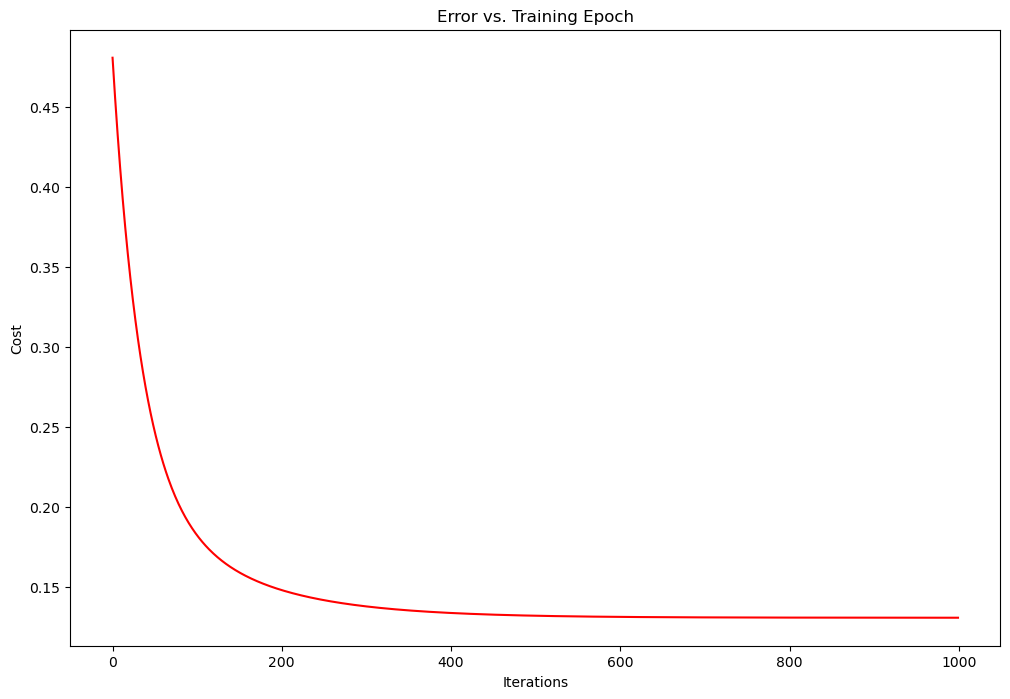

In [68]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [25]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

scikit-learn model的预测表现

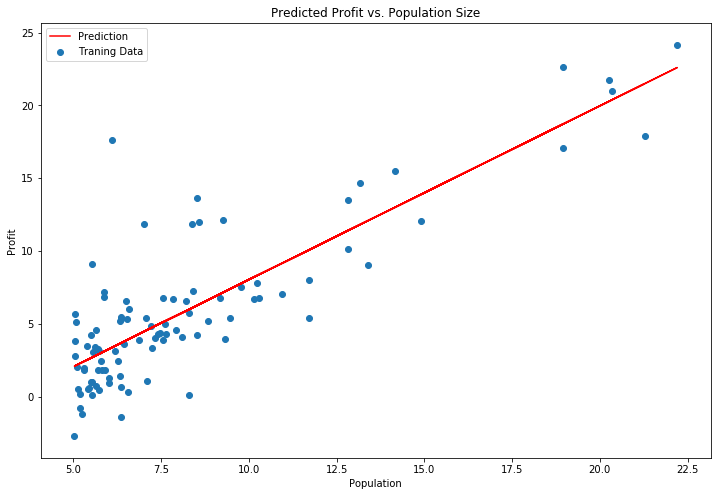

In [26]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# 4. normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [27]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [28]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

In [29]:
#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

在练习2中，我们将看看分类问题的逻辑回归。